In [ ]:
# Necessary libraries 

import SimpleITK as sitk
import skimage as skimg
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import dicom2nifti

In [11]:
# Hard-coded variables

ref_img_path     =        '/Users/lalith/Documents/PANDA/Gradient-image-37.nii'
grad_img_path    =        '/Users/lalith/Documents/PANDA'
src_se_list      =        []
epsilon          =        1


In [12]:
# The part that measures shannon-entropy for structural finger-printing

itk_fixed=sitk.ReadImage(ref_img_path)
for x in tqdm(range(1,38)):
    pass
    itk_moved=sitk.ReadImage(grad_img_path+'/Gradient-image-'+str(x)+'.nii');
    moved_img= sitk.GetArrayFromImage(itk_moved)
    fixed_img=sitk.GetArrayFromImage(itk_fixed)
    ssim_3d_sk = skimg.measure.compare_ssim(moved_img, fixed_img, multichannel=False, gaussian_weights=True, data_range=1.0, use_sample_covariance=False)
    nrmse=skimg.measure.compare_nrmse(moved_img,fixed_img)
    src_se=skimg.measure.shannon_entropy(moved_img, base=2)
    src_se_list.append(src_se)
    ref_se=skimg.measure.shannon_entropy(fixed_img, base=2)
    
src_shannon_val                             =     np.array(src_se_list)
ref_shannon_val                             =     np.array(ref_se)
similarity_shannon                          =     abs(ref_shannon_val-src_shannon_val)
selected_frames                             =     similarity_shannon<epsilon # Lesser it is better similarity
frames_where_gans_can_be_applied            =     np.where(selected_frames==True)

Text(0.5, 1.0, '(array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]),)')

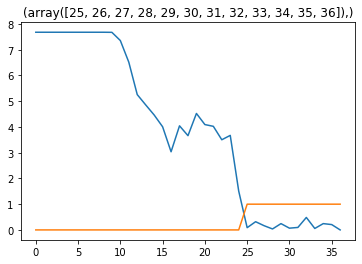

In [4]:
# Plot them all.

plt.title(frames_where_gans_can_be_applied)
plt.plot(similarity_shannon)
plt.plot(selected_frames)

